In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download("vader_lexicon")
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Angga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Angga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

LABELLING USING LEXICON BASED APPROACH

In [11]:

# Baca data dari file Excel dan gabungkan
data = pd.read_excel('dataset/ganjar.xlsx')
data = data[['full_text']]

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["full_text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["full_text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["full_text"]]
data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["full_text"]]

score= data["Compound"].values
sentiment = []
for i in score:
  if i >= 0.05:
    sentiment.append('positif')
  elif i <= -0.05 :
    sentiment.append('negatif')
  else:
    sentiment.append('netral')
data["sentiment"] = sentiment

data = data[['full_text', 'sentiment']]

data['sentiment'].value_counts()

sentiment
netral     682
positif     46
negatif      6
Name: count, dtype: int64

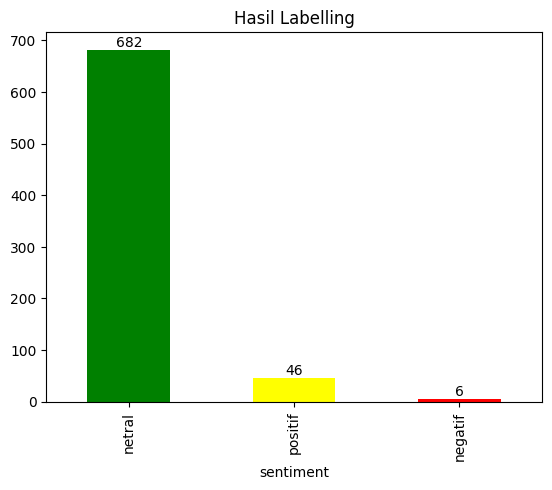

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

count_Class = pd.value_counts(data["sentiment"], sort=True)
ax = count_Class.plot(kind='bar', color=["green", "yellow", "red"])
plt.title('Hasil Labelling')

# Menambahkan teks jumlah di atas masing-masing batang
for i, v in enumerate(count_Class):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [13]:
data['casefolding'] = data['full_text'].str.lower()

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus @..
    text = re.sub(r'#', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]+', '', text) # menghapus RT
    text = re.sub(r'https?:\/\/\S+', '', text) # menghapus url
    text = re.sub(r':\)', '', text) # menghapus icon
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # menghapus single character
    text = re.sub(r'\s+', ' ', text) # menghapus spasi ganda
    text = re.sub(r'[^\w\s]', '', text) # menghapus punctuation
    text = re.sub(r'\.+', '', text) #menghilangkan teks yang mengandung akhiran MULTIPLE TITIK (...)
    text = re.sub(r'\d+', '', text) #menghilangkan teks yang mengandung angka
    text = re.sub(r'\b\w{1,2}\b', '', text) #menghilangkan teks yang mengandung 1-2 huru
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.encode('ascii', 'ignore').decode('ascii') # menghapus non-ascii (EMOTICON)
    return text

data['cleansing'] = data['casefolding'].apply(clean_text)
# delete row with null value
data = data.dropna()
# menghapus row yang memiliki nilai text kosong
data = data[data['cleansing'] != '']
data.reset_index(drop=True, inplace = True)
# Menghapus text duplikat
data.cleansing.duplicated().sum()
data.loc[data.cleansing.duplicated(), :]
data.drop_duplicates(subset=['cleansing'], inplace=True)
data.reset_index(drop=True, inplace = True)
                
#TOKENIZING
def tokenizing(text):
    nstr = text.split(' ')
    md= []
    a = -1
    for hu in nstr:
        a = a + 1
    if hu == '':
        md.append(a)
    p = 0
    b = 0
    for q in md:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr
    
data['tokenizing'] = data['cleansing'].apply(tokenizing)

def stopword_removal(text):
    factory = stopwords.words('indonesian', 'english')
    x = []
    dkk = []
    def myFunc(x):
        if x in factory:
            return False
        else:
            return True
    fit = filter(myFunc, text)
    for x in fit:
        dkk.append(x)
    return dkk               
data['stopword_removal'] = data['tokenizing'].apply(stopword_removal)
data.to_excel('data/ganjar_preprocessing.xlsx')
data.head()

,full_text,sentiment,casefolding,cleansing,tokenizing,stopword_removal
0,"""""@ganjarpranowo @Yansoesilo @LaporGub_ @Lapor...",netral,"""""@ganjarpranowo @yansoesilo @laporgub_ @lapor...",beruntung amat pak hari setelah lapor langs...,"[, , beruntung, amat, pak, , hari, setelah, la...","[, , beruntung, , lapor, langsung, ditanggapi,..."
1,"""""@ganjarpranowo @prabowo @PDemokrat @AndiArie...",netral,"""""@ganjarpranowo @prabowo @pdemokrat @andiarie...",anakkolong mbaksri sedang trending anak pepo...,"[, anakkolong, mbaksri, , sedang, trending, an...","[, anakkolong, mbaksri, , trending, anak, pepo..."
2,"""""Menjadi putra semata wayang dari Ganjar Pran...",netral,"""""menjadi putra semata wayang dari ganjar pran...",menjadi putra semata wayang dari ganjar pranow...,"[menjadi, putra, semata, wayang, dari, ganjar,...","[putra, wayang, ganjar, pranowo, siti, atikoh,..."
3,"""""@BungkusTukang @ganjarpranowo Siapa yg perca...",netral,"""""@bungkustukang @ganjarpranowo siapa yg perca...",siapa percaya hasil dri lambaga survei,"[, siapa, , percaya, hasil, dri, lambaga, survei]","[, , percaya, hasil, dri, lambaga, survei]"
4,"""""Kemaren @budimandjatmiko dan @prabowo Seka...",netral,"""""kemaren @budimandjatmiko dan @prabowo seka...",kemaren dan sekarang dan next dan atau berca...,"[kemaren, dan, sekarang, dan, next, dan, , ata...","[kemaren, next, , , bercandanya, tuhan, terkad..."


In [5]:
data = data[['stopword_removal', 'sentiment']]
data.rename(columns={'stopword_removal':'text'}, inplace=True)
data.to_csv('data/dataGanjar.csv', index=False)

TRAINING MULTINOMIAL NAIVE BAYES CLASSIFIER

Accuracy: 0.9328358208955224
Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
      netral       0.94      0.99      0.97       126
     positif       0.00      0.00      0.00         6

    accuracy                           0.93       134
   macro avg       0.31      0.33      0.32       134
weighted avg       0.88      0.93      0.91       134



c:\Users\Angga\anaconda3\envs\skripsienv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angga\anaconda3\envs\skripsienv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angga\anaconda3\envs\skripsienv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


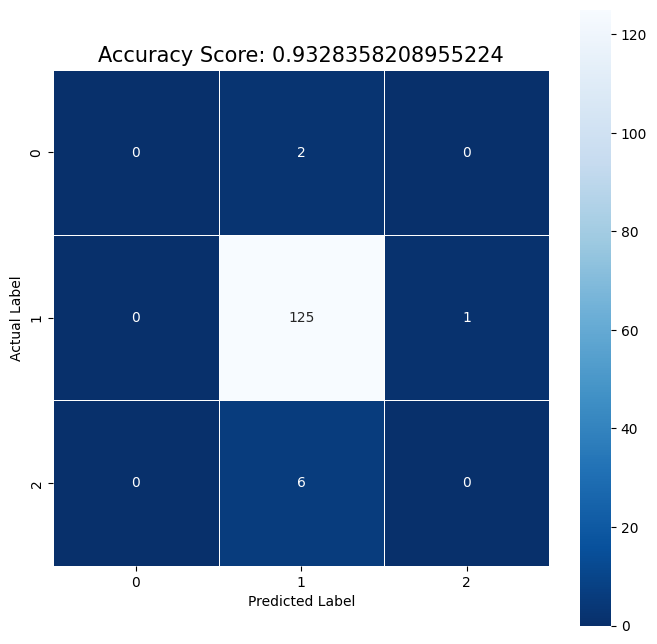

Text(0.5, 1.0, 'Hasil Prediksi')

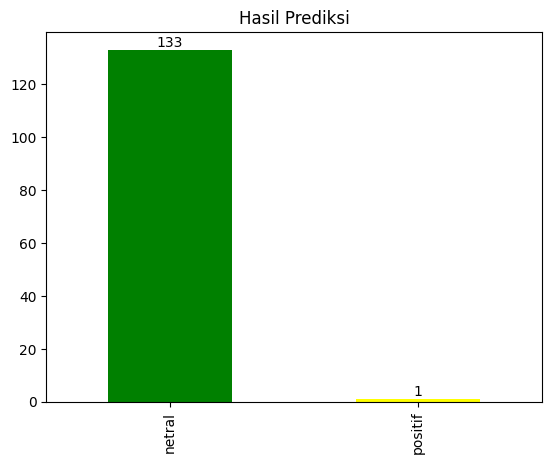

In [8]:
# Baca data dari file CSV
df = pd.read_csv('data/dataGanjar.csv')
df = df[['text', 'sentiment']]

# Bagi data menjadi data latih dan data uji
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ekstraksi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Melatih model dengan Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Melakukan prediksi
y_pred = clf.predict(X_test)

# Menampilkan hasil
print("Accuracy:", accuracy_score(y_test, y_pred))

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)), size=15)
plt.show()


# visualisasikan grafik jumlah hasil prediksi negatif, positif, dan netral yang diprediksi benar menggunakan diagram batang
import matplotlib.pyplot as plt
import pandas as pd
count_Class = pd.value_counts(y_pred, sort=True)
ax = count_Class.plot(kind='bar', color=["green", "yellow", "red"])
# Menambahkan teks jumlah di atas masing-masing batang
for i, v in enumerate(count_Class):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title('Hasil Prediksi')


